In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [78]:
df = pd.read_csv("../data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploracion Inicial
Conociendo el dataset

In [79]:
#Dimension y esquema del dataset
dimension = df.shape
print(f"Dataset {df.shape[0]} filas x {df.shape[1]} columnas")
display(df.head())

Dataset 918 filas x 12 columnas


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
col_chestpaintype = df["ChestPainType"].value_counts()
col_chestpaintype

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [81]:
df["ChestPainType"] = df["ChestPainType"].replace({"ASY":"Asintomatico","NAP":"Dolor no relacionado", "ATA":"Dolor atipico", "TA":"Dolor angina"})
df["ChestPainType"].value_counts()

ChestPainType
Asintomatico            496
Dolor no relacionado    203
Dolor atipico           173
Dolor angina             46
Name: count, dtype: int64

In [82]:
#Detalle por columna
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 291.2 KB


In [83]:
#Analisis estadistico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [84]:
#Renombramiento de columnas
df = df.rename(columns={
    "Age": "años",
    "Sex": "genero",
    "ChestPainType": "tipo_dolor_pecho",
    "RestingBP": "presion_arterial_reposo",
    "Cholesterol": "colesterol",
    "FastingBS": "azucar_ayunas",
    "RestingECG": "ecg_reposo",
    "MaxHR": "frecuencia_maxima",
    "ExerciseAngina": "angina",
    "Oldpeak": "depresion_ST",
    "ST_Slope": "pendiente_ST",
    "HeartDisease": "enfermedad_cardiaca"
})

df.columns

Index(['años', 'genero', 'tipo_dolor_pecho', 'presion_arterial_reposo',
       'colesterol', 'azucar_ayunas', 'ecg_reposo', 'frecuencia_maxima',
       'angina', 'depresion_ST', 'pendiente_ST', 'enfermedad_cardiaca'],
      dtype='object')

In [85]:
mediana_presion = df.loc[df["presion_arterial_reposo"] != 0, "presion_arterial_reposo"].median()
df["presion_arterial_reposo"] = df["presion_arterial_reposo"].replace(0,mediana_presion)

mediana_colesterol = df.loc[df["colesterol"] != 0, "colesterol"].median()
df["colesterol"] = df["colesterol"].replace(0, mediana_colesterol)


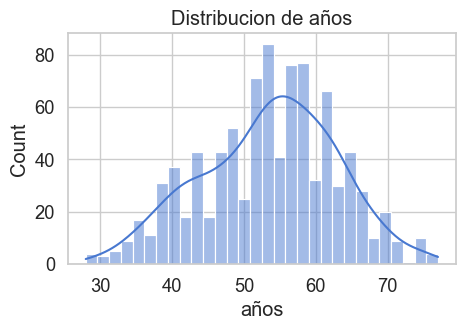

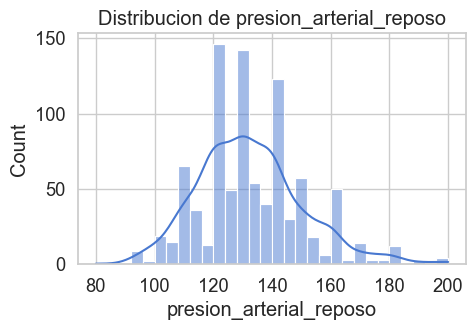

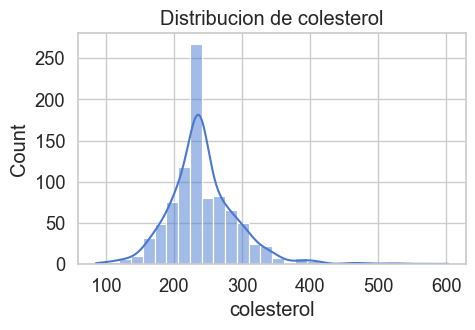

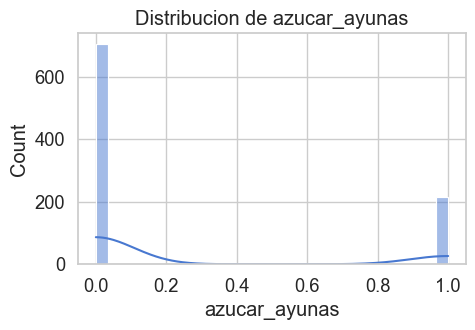

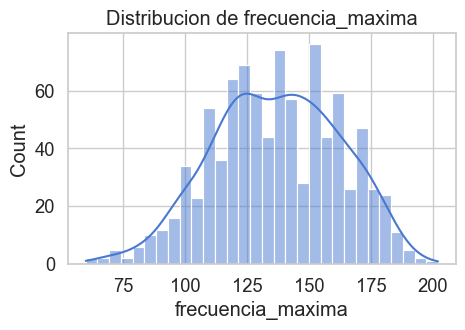

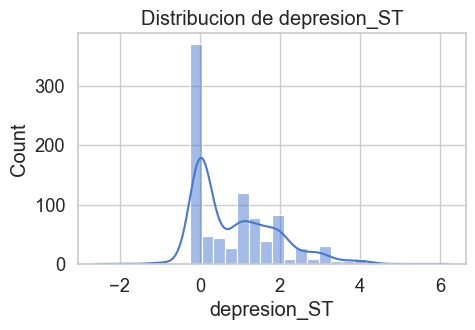

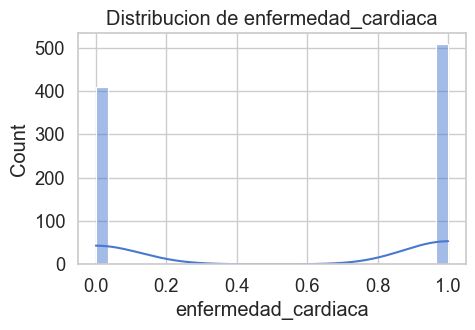

In [86]:
%matplotlib inline
#Seleccion de columnas numericas
columnas_numericas = df.select_dtypes(include=['number']).columns



for titulo in columnas_numericas:
    plt.figure(figsize=(5,3))
    sns.histplot(df[titulo], kde=True, bins=30)
    plt.title(f"Distribucion de {titulo}")
    plt.show()
   



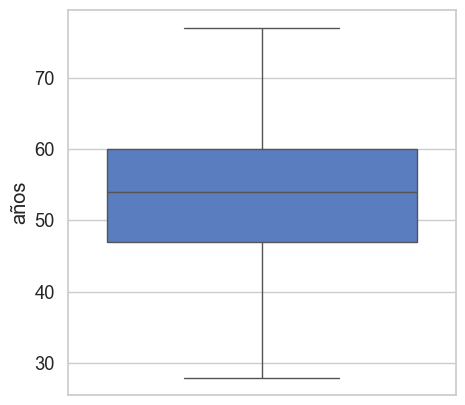

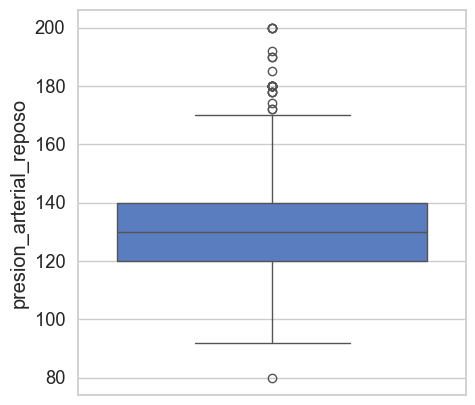

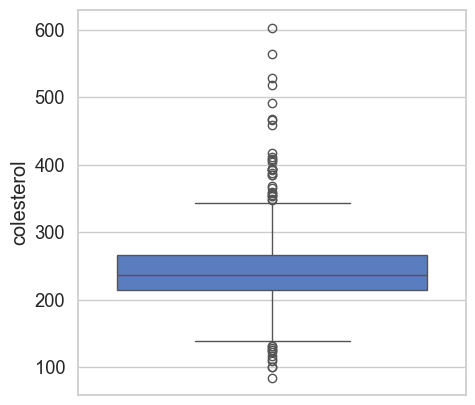

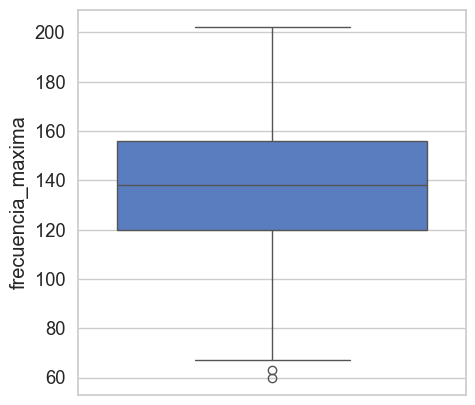

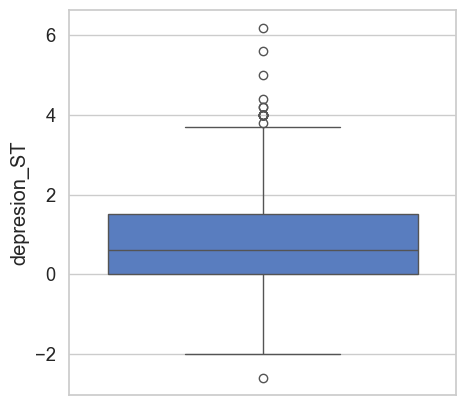

In [87]:
col_boxplot = ['años', 'presion_arterial_reposo', 'colesterol', 
            'frecuencia_maxima', 'depresion_ST']


for columna in col_boxplot:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df[columna])
    plt.show()
    

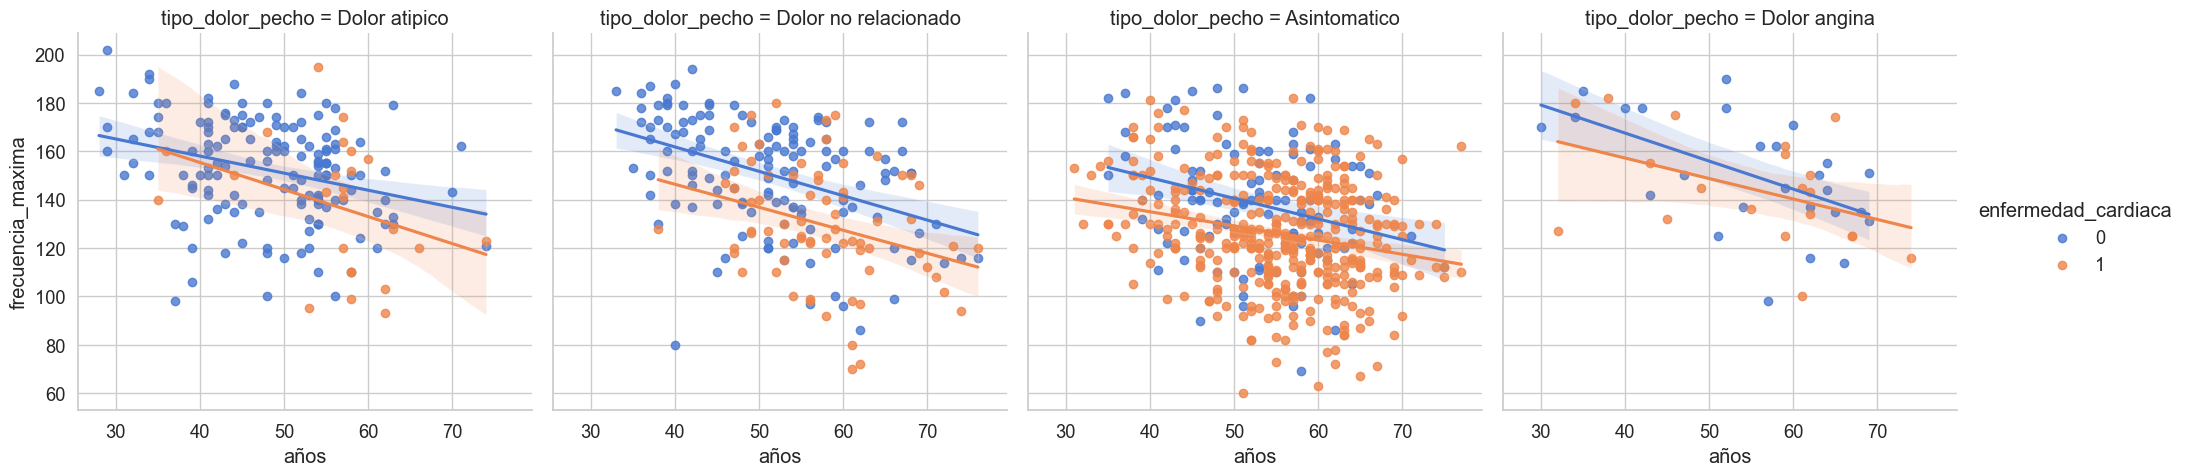

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.lmplot(data=df, x='años', y='frecuencia_maxima', hue="enfermedad_cardiaca", col='tipo_dolor_pecho')